<a href="https://colab.research.google.com/github/JiaxinLi-lipluszn/Temp_notebooks/blob/main/Load_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load model part

In [ ]:
import os 
os.chdir("/content/drive/MyDrive/DINO_Group/128+2-Fourier-128")

In [ ]:
import os 
os.chdir("/content/drive/MyDrive/scRNA/Stoeckiues/")

In [ ]:
import vision_transformer_sc as vits
import utils

In [ ]:
from importlib import reload  
import vision_transformer as vits  
vits = reload(vits) 

In [ ]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

In [ ]:
model = vits.vit_tiny()
#print(f"Model {args.arch} {args.patch_size}x{args.patch_size} built.")
utils.load_pretrained_weights(model, "/content/drive/Shareddrives/Documentation/Jie_Sheng/scRNA_128+128/checkpoint0120.pth", "student", "vit_tiny", 16)

#utils.load_pretrained_weights(model, "/content/drive/MyDrive/DINO_Group/128+2-Fourier-128/128+2-F-128/checkpoint0290.pth", "student", "vit_tiny", 16)

#utils.load_pretrained_weights(model, "/content/drive/MyDrive/DINO_Group/128plus128/128plus128/checkpoint0355.pth", "student", "vit_tiny", 16)
model.eval()


Take key student in provided checkpoint dict
Pretrained weights found at /content/drive/Shareddrives/Documentation/Jie_Sheng/scRNA_128+128/checkpoint0120.pth and loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])


VisionTransformer(
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=256, out_features=768, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=256, out_features=256, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=256, out_features=1024, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=1024, out_features=256, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=256, out_fe

In [ ]:
pip install umap-learn

     |████████████████████████████████| 80 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 11.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=32e447e49e82d59b6426ec83ad238ead3db6fd65483b34980aeb5c182eeb58ea
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=e5ab520d5d8201883642743ba66d724d3ab0344a6738e735e12a107da1ef48a3
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [ ]:
pip install scprep

     |████████████████████████████████| 104 kB 7.0 MB/s 


# UMAP

## Color by the average expression

In [ ]:
import pandas as pd
newdata = pd.read_csv("/content/drive/MyDrive/scRNA/data/rna_withlabels.csv", index_col=0)

In [ ]:
cell_types = list(pd.unique(newdata[newdata.columns[-1]]))

In [ ]:
df_dir = {}
for cell_type in cell_types:
  df = newdata.loc[newdata[newdata.columns[-1]] == cell_type]
  df_dir[cell_type] = df.drop(newdata.columns[-1], axis  = 1)

In [ ]:
import numpy as np
mean_dir = {}
for cell_type in cell_types:
  mean_ls = list(df_dir[cell_type].mean())
  mean_dir[cell_type] = list(np.log([i + abs(min(mean_ls)) + 0.0001 for i in mean_ls]))

torch.Size([2000, 128])


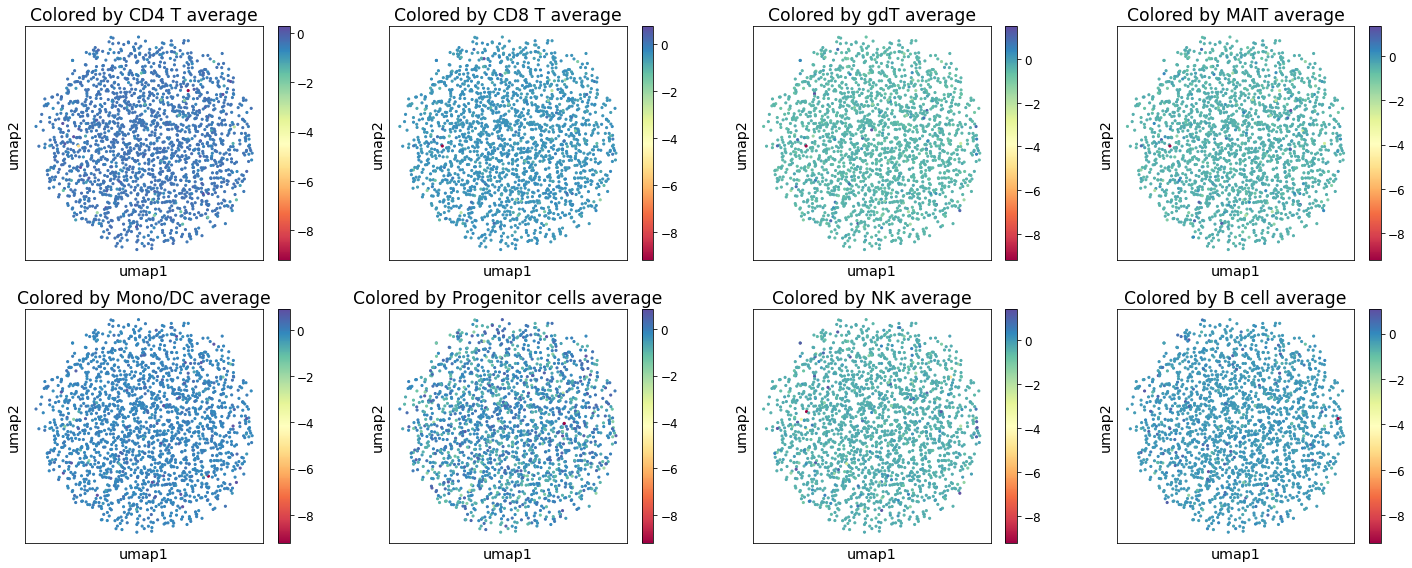

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import scprep
import numpy as np
import math

## First, load index embedding weights from the learned model 


pos_embed = model.state_dict().get('Embedding.weight').cpu()
print(pos_embed.shape)
## Secondly, calculate 784 pixels' embedding coordinates
emb_cor = pos_embed # emb_cor.shape shoule be (784, coordinates dimensions). perhaps you need pandas.DataFrame here

color = mean_dir["MAIT"]
'''
## Also, you need to calculate/load ground truth coordinates:
x_cor = np.arange(784) // 28 - 14 # should be an array/series (784-dim vector)
y_cor = np.arange(784) % 28 - 14
max_norm = []
l2_norm = []
for i in range(784):
  max_norm.append(max(abs(x_cor[i]), abs(y_cor[i])))
  l2_norm.append(math.sqrt(x_cor[i]**2 + y_cor[i]**2))
max_norm = np.array(max_norm)

l2_norm = np.array(l2_norm)
'''
## Then, run the following to plot the figure.

umap_operator = umap.UMAP(n_components=2, n_neighbors= 30) # n_components = 2: 2-dim umap 
Y_UMAP = umap_operator.fit_transform(emb_cor) 


### visualization ###
import matplotlib.pyplot as plt
fig,((ax1,ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,  figsize=(20, 8))

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by CD4 T average",
                      c=mean_dir['CD4 T'], ticks=False, cmap='Spectral', ax=ax1)

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by CD8 T average",
                      c=mean_dir['CD8 T'], ticks=False, cmap='Spectral', ax=ax2) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by gdT average",
                      c=mean_dir['gdT'], ticks=False, cmap='Spectral', ax=ax3) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by MAIT average",
                      c=mean_dir['MAIT'], ticks=False, cmap='Spectral', ax=ax4) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by Mono/DC average",
                      c=mean_dir['Mono/DC'], ticks=False, cmap='Spectral', ax=ax5) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by Progenitor cells average",
                      c=mean_dir['Progenitor cells'], ticks=False, cmap='Spectral', ax=ax6) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by NK average",
                      c=mean_dir['NK'], ticks=False, cmap='Spectral', ax=ax7) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="Colored by B cell average",
                      c=mean_dir['B cell'], ticks=False, cmap='Spectral', ax=ax8) 

plt.tight_layout()
plt.show()

## FashionMNIST color strategy

torch.Size([784, 2])


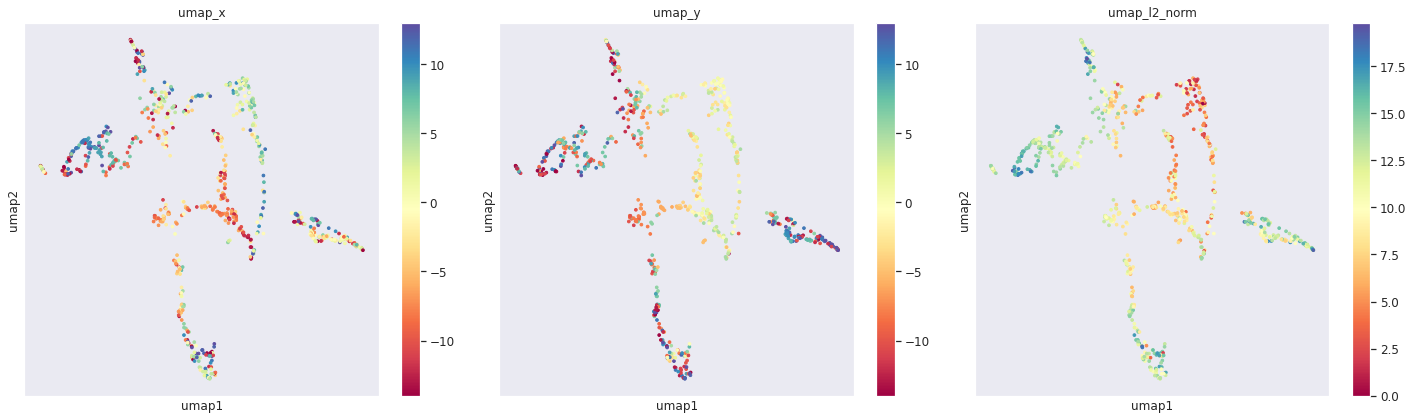

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import scprep
import numpy as np
import math

## First, load index embedding weights from the learned model 


pos_embed = model.state_dict().get('Embedding.weight').cpu()
print(pos_embed.shape)
## Secondly, calculate 784 pixels' embedding coordinates
emb_cor = pos_embed # emb_cor.shape shoule be (784, coordinates dimensions). perhaps you need pandas.DataFrame here

## Also, you need to calculate/load ground truth coordinates:
x_cor = np.arange(784) // 28 - 14 # should be an array/series (784-dim vector)
y_cor = np.arange(784) % 28 - 14
max_norm = []
l2_norm = []
for i in range(784):
  max_norm.append(max(abs(x_cor[i]), abs(y_cor[i])))
  l2_norm.append(math.sqrt(x_cor[i]**2 + y_cor[i]**2))
max_norm = np.array(max_norm)

l2_norm = np.array(l2_norm)

## Then, run the following to plot the figure.

umap_operator = umap.UMAP(n_components=2, n_neighbors= 30) # n_components = 2: 2-dim umap 
Y_UMAP = umap_operator.fit_transform(emb_cor) 


### visualization ###
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_x",
                      c=x_cor, ticks=False, cmap='Spectral', ax=ax1)

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_y",
                      c=y_cor, ticks=False, cmap='Spectral', ax=ax2) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_l2_norm",
                      c=l2_norm, ticks=False, cmap='Spectral', ax=ax3) 

plt.tight_layout()
plt.show()

In [ ]:
Y_UMAP.shape

(784, 2)

# Direct

torch.Size([784, 2])


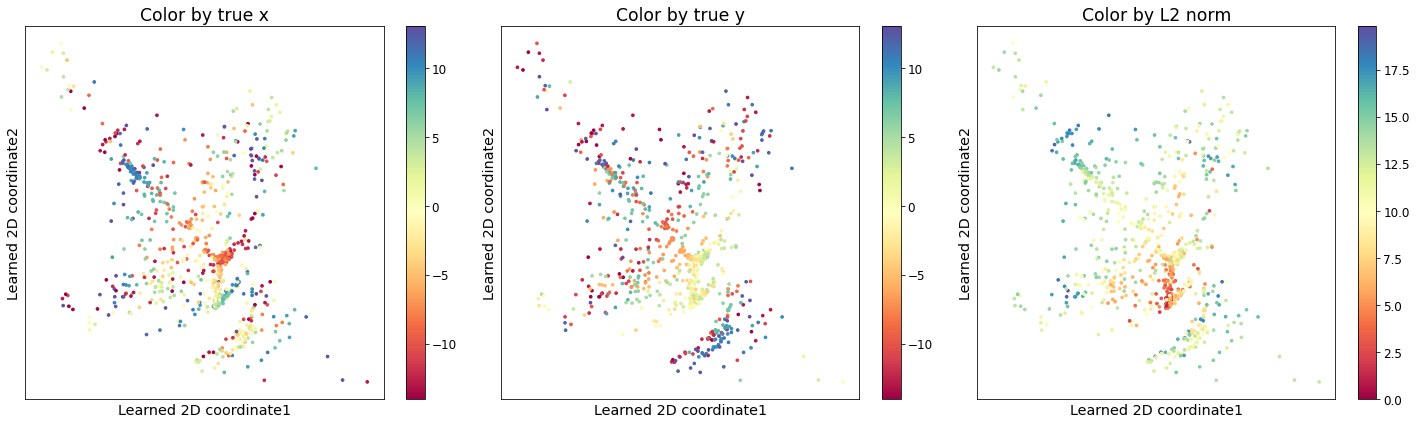

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import scprep
import numpy as np
import math

## First, load index embedding weights from the learned model 


pos_embed = model.state_dict().get('Embedding.weight').cpu()
print(pos_embed.shape)
## Secondly, calculate 784 pixels' embedding coordinates
emb_cor = pos_embed # emb_cor.shape shoule be (784, coordinates dimensions). perhaps you need pandas.DataFrame here

## Also, you need to calculate/load ground truth coordinates:
x_cor = np.arange(784) // 28 - 14 # should be an array/series (784-dim vector)
y_cor = np.arange(784) % 28 - 14
max_norm = []
l2_norm = []
for i in range(784):
  max_norm.append(max(abs(x_cor[i]), abs(y_cor[i])))
  l2_norm.append(math.sqrt(x_cor[i]**2 + y_cor[i]**2))
max_norm = np.array(max_norm)

l2_norm = np.array(l2_norm)

### visualization ###
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

scprep.plot.scatter2d(np.array(emb_cor), label_prefix="Learned 2D coordinate", title="Color by true x",
                      c=x_cor, ticks=False, cmap='Spectral', ax=ax1)

scprep.plot.scatter2d(np.array(emb_cor), label_prefix="Learned 2D coordinate", title="Color by true y",
                      c=y_cor, ticks=False, cmap='Spectral', ax=ax2) 
scprep.plot.scatter2d(np.array(emb_cor), label_prefix="Learned 2D coordinate", title="Color by L2 norm",
                      c=l2_norm, ticks=False, cmap='Spectral', ax=ax3) 

plt.tight_layout()
plt.show()

In [ ]:
import torch.nn as nn
#import sklearn.model_selection.train_test_split

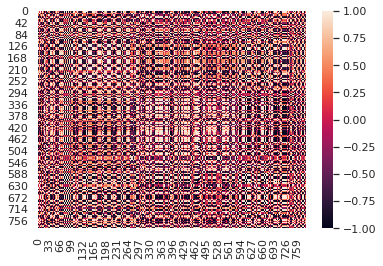

In [ ]:
pos_embed = model.state_dict().get('Embedding.weight').cpu()

import seaborn as sns; sns.set_theme()
import sklearn
input1 = pos_embed
input2 = pos_embed
cos = nn.CosineSimilarity(dim=1)
#input = IndexToCorr(np.arange(784))
#input = np.array(input).T + 1/28
#print(len(input))
#print(input)
p1 = sklearn.metrics.pairwise.cosine_similarity(pos_embed, pos_embed, dense_output=True)
#print(p1)
#similarity  = cos(input1, input2)

p2 = p1[406,:].reshape(28,28)
#print(p2)
ax = sns.heatmap(p1)

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import scprep

## First, load index embedding weights from the learned model 


pos_embed = model.state_dict().get('Embedding.weight').cpu()
pos_embed = pos_embed.numpy().transpose()
print(pos_embed.shape)
## Secondly, calculate 784 pixels' embedding coordinates
emb_cor = pos_embed # emb_cor.shape shoule be (784, coordinates dimensions). perhaps you need pandas.DataFrame here

## Also, you need to calculate/load ground truth coordinates:
x_cor = np.arange(784) // 28 -14 # should be an array/series (784-dim vector)
y_cor = np.arange(784) % 28  -14
max_norm = []
for i in range(784):
  max_norm.append(max(abs(x_cor[i]), abs(y_cor[i])))
max_norm = np.array(max_norm).reshape(784)
x_cor = x_cor.reshape(784)




### visualization ###
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

#plt.scatter(x_cor/28, y_cor/28, c = x_cor)
ax1 = plt.scatter(pos_embed[0], pos_embed[1], c=x_cor)
ax2 = plt.plot(pos_embed[0], pos_embed[1], 
        c=y_cor) 
ax3 = plt.plot(pos_embed[0], pos_embed[1], 
        c=max_norm) 

plt.tight_layout()
plt.show()

(2, 784)


ValueError: ignored

<Figure size 1440x432 with 3 Axes>

# Draw loss curve

In [ ]:
import re
import numpy as np
import pandas as pd

In [ ]:
def loadLoss(log_dir, model_name):
  output_dir = log_dir
  log_file_name = "log.txt"
  f = open(output_dir + log_file_name)              
  line = f.readline()     
  df = pd.DataFrame(columns = ["Epoch",model_name + " Train Loss"])
  while line: 
    numbers = np.array(re.findall("{\"train_loss\": (.+?), \"train_lr\": (.+?), \"train_wd\": (.+?), \"epoch\": (.+?)}", line)).astype(np.float)    
    numbers = numbers[0]
    loss = numbers[0]
    print(loss)
    epoch = numbers[-1]
    #print(type(epoch))
    aline =  {"Epoch":epoch,model_name + " Train Loss": loss}
    df = df.append(aline, ignore_index= True )
    
    line = f.readline() 

  f.close() 
  return df

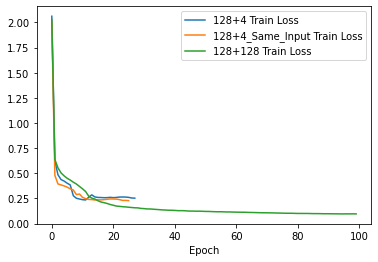

In [ ]:
loss_df.plot (x = "Epoch")

# Load Acc part

In [1]:
def loadKNNAcc(acc_dir, model_name, ts):
  output_dir = acc_dir
  log_file_name = ts + "_knn_acc.txt"
  f = open(output_dir + log_file_name)              
  line = f.readline()     
  df = pd.DataFrame(columns = ["Epoch",model_name + " " + ts])
  while line: 
    numbers = np.array(re.findall("epoch: (.+?), 10-NN classifier result: Top1: (.+?), Top5: (.+?)", line)).astype(np.float)    
    #print(numbers)
    numbers = numbers[0]
    acc = numbers[1]
    epoch = int(numbers[0])
    #print(type(epoch))
    print(epoch)
    aline =  {"Epoch":epoch,model_name + " " + ts: acc}
    df = df.append(aline, ignore_index= True )
    
    line = f.readline() 

  f.close() 
  return df

In [32]:
def loadttAcc(acc_dir, model_name):
  output_dir = acc_dir
  log_file_name = "acc.txt"
  f = open(output_dir + log_file_name)              
  line = f.readline()     
  df = pd.DataFrame(columns = ["Epoch",model_name + " train acc ", model_name + " test acc "])
  while line: 
    #numbers = np.array(re.findall("epoch: (.+?), 10-NN classifier result: Top1: (.+?), Top5: (.+?)", line)).astype(np.float)    
    numbers = np.array(re.findall("{\"Training Accuracy\": \"(.+?) %\", \"Testing Accuracy\": \"(.+?) %\", \"epoch\": (.+?)}", line)).astype(np.float)    
    
    #print(numbers)
    numbers = numbers[0]
    train_acc = numbers[0]
    test_acc = numbers[1]
    epoch = int(numbers[2])
    #print(type(epoch))
    #print(epoch)
    aline =  {"Epoch":epoch, model_name + " train acc ": train_acc, model_name + " test acc ": test_acc}
    df = df.append(aline, ignore_index= True )
    
    line = f.readline() 

  f.close()
  return df 

In [2]:
import pandas as pd
import numpy as np
import re

In [28]:
model_dic = {
    "/content/drive/Shareddrives/Documentation/Jiaxin_Li/Supervised_perturb/128+128_bmcite_no_scale_Aug30/" : "bmcite not scaled",
    "/content/drive/Shareddrives/Documentation/Jiaxin_Li/Supervised_perturb/128+128_bmcite_scale_Aug31_M/" : "bmcite scaled",
    
    #"/content/drive/MyDrive/DINO_Group/128+128_TS/": "128+128",
    #"/content/drive/MyDrive/DINO_Group/128plus128/": "128plus128",
    #"/content/drive/MyDrive/DINO_Group/128+2-Fourier-128/": "128+2-Fourier-128",
    #"/content/drive/MyDrive/DINO_Group/128+4/": "128+4",
    #"/content/drive/MyDrive/DINO_Group/128+2-Fourier-4/": "128+2 Learnable Fourier 4",
    #"/content/drive/MyDrive/DINO_Group/128+4_Same_Input/": "128+4 Same Input",
    #"/content/drive/MyDrive/DINO_Group/128/": "Only 128D pixel",
    #"/content/drive/MyDrive/DINO_Group/0803_dino_kd_crop_size/global_50_local_50/": "128+4 0.5/0.25",
    #"/content/drive/MyDrive/DINO_Group/acc/local125/": "128+4 0.5/0.125",
    #"/content/drive/MyDrive/DINO_Group/0803_dino_kd_crop_size/global_50_local_75/": "128+4 0.5/0.375"
}

In [4]:
epochs = [5* i for i in range(100)]

In [5]:
acc_df = pd.DataFrame(epochs,columns = ["Epoch"])

In [6]:
acc_df = acc_df.drop(index=acc_df.index)

In [7]:


acc_df = pd.DataFrame(columns = ["Epoch"])
for model in model_dic.keys():
  for key in ["teacher", "student"]:
    df = loadKNNAcc(model, model_dic[model], key)
    acc_df = pd.merge(acc_df, df, how = "outer", on = "Epoch")
#acc_df = acc_df.sort_values(by="Epoch" , ascending=True) 

FileNotFoundError: ignored

In [30]:
acc_df

,Epoch,bmcite not scaled train acc,bmcite not scaled test acc,bmcite scaled train acc,bmcite scaled test acc
0,1.0,80.678160,80.863896,75.991360,76.202119
1,4.0,84.517260,84.123879,84.541713,84.042380
2,7.0,86.420508,85.639772,86.599829,85.215974
3,10.0,87.504585,87.449063,86.489791,86.617767
4,13.0,88.686473,88.003260,86.726169,86.079870
...,...,...,...,...,...
89,268.0,NaN,NaN,94.946407,90.252649
90,271.0,NaN,NaN,95.635163,89.861451
91,274.0,NaN,NaN,95.655541,90.057050
92,277.0,NaN,NaN,95.643314,90.236349


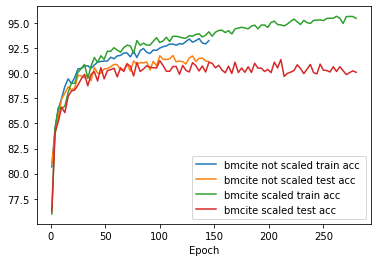

In [34]:
acc_df.plot(x = "Epoch")

In [21]:
df

In [33]:
acc_df = pd.DataFrame(columns = ["Epoch"])
for model in model_dic.keys():
    df = loadttAcc(model, model_dic[model])
    acc_df = pd.merge(acc_df, df, how = "outer", on = "Epoch")

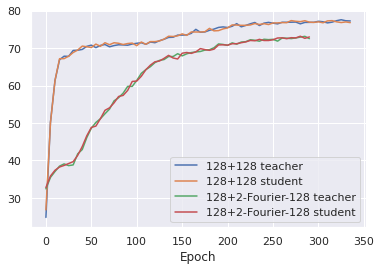

In [ ]:
acc_df.plot(x = "Epoch")

In [ ]:
acc_df["Dif 0.5/0.25"] = acc_df["128+4 0.5/0.25 teacher"] - acc_df["128+4 0.5/0.25 student"]

In [ ]:
acc_df["Dif 0.5/0.125"] = acc_df["128+4 0.5/0.125 teacher"] - acc_df["128+4 0.5/0.125 student"]

In [ ]:
acc_df['next_acc'] = acc_df["128+4 0.5/0.25 student"].shift(1)


In [ ]:
acc_df["Dif_shift"] = acc_df["Dif 0.5/0.25"].shift(1)

In [ ]:
acc_df['improve'] = acc_df["128+4 0.5/0.25 student"] - acc_df['next_acc']

In [ ]:
len(acc_df)

300

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
acc_df.corr('spearman')

,Epoch,128+4 0.5/0.25 teacher,128+4 0.5/0.25 student,128+4 0.5/0.125 teacher,128+4 0.5/0.125 student,next_acc,improve,Dif 0.5/0.25,Dif 0.5/0.125,Dif_shift
Epoch,1.000000,0.978115,0.979426,0.881455,0.887793,0.979426,-0.237157,0.116559,0.066643,0.116559
128+4 0.5/0.25 teacher,0.978115,1.000000,0.965746,0.936906,0.915791,0.964671,-0.233769,0.199112,0.136506,0.111992
128+4 0.5/0.25 student,0.979426,0.965746,1.000000,0.926143,0.920110,0.964201,-0.150831,0.039124,0.106601,0.131464
128+4 0.5/0.125 teacher,0.881455,0.936906,0.926143,1.000000,0.883158,0.920712,-0.231844,0.141609,0.227429,0.099948
128+4 0.5/0.125 student,0.887793,0.915791,0.920110,0.883158,1.000000,0.922055,-0.236439,0.094731,-0.109263,0.095910
next_acc,0.979426,0.964671,0.964201,0.920712,0.922055,1.000000,-0.317688,0.107517,0.097241,0.039124
improve,-0.237157,-0.233769,-0.150831,-0.231844,-0.236439,-0.317688,1.000000,-0.453285,-0.052196,0.407194
Dif 0.5/0.25,0.116559,0.199112,0.039124,0.141609,0.094731,0.107517,-0.453285,1.000000,0.149532,0.045207
Dif 0.5/0.125,0.066643,0.136506,0.106601,0.227429,-0.109263,0.097241,-0.052196,0.149532,1.000000,-0.003631
Dif_shift,0.116559,0.111992,0.131464,0.099948,0.095910,0.039124,0.407194,0.045207,-0.003631,1.000000


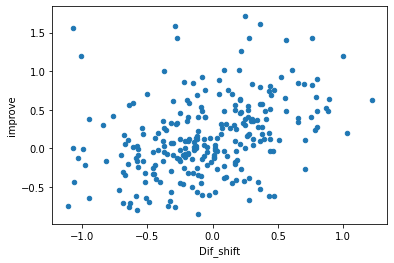

In [ ]:
acc_df.plot.scatter(x = "Dif_shift", y = "improve")

In [ ]:
acc_df

,Epoch,128+128 teacher,128+128 student,128plus128 teacher,128plus128 student
0,0.0,24.80,26.80,23.07,23.72
1,5.0,50.20,50.06,44.74,44.85
2,10.0,61.33,61.34,49.93,50.73
3,15.0,66.88,67.15,52.15,52.01
4,20.0,67.82,67.17,56.39,57.29
...,...,...,...,...,...
75,375.0,NaN,NaN,72.80,72.04
76,380.0,NaN,NaN,72.58,72.50
77,385.0,NaN,NaN,72.58,72.53
78,390.0,NaN,NaN,71.91,72.78


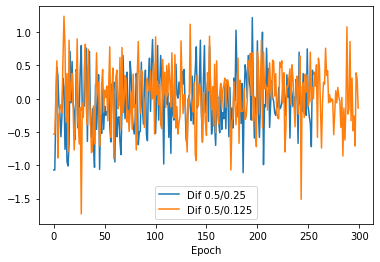

In [ ]:
acc_df.plot(x = "Epoch", y = ["Dif 0.5/0.25", "Dif 0.5/0.125"])

In [ ]:
df_t = loadKNNAcc("./", "128+128", "teacher")

[[ 0.  24.8  7. ]]
[[ 5.  50.2  8. ]]
[[10.   61.33  9.  ]]
[[15.   66.88  9.  ]]
[[20.   67.82  9.  ]]
[[25.   67.78  9.  ]]
[[30.   69.35  9.  ]]
[[35.   69.41  9.  ]]
[[40.   69.63  9.  ]]
[[45.   70.45  9.  ]]
[[50.   70.77  9.  ]]
[[55.   70.11  9.  ]]
[[60.  70.7  9. ]]
[[65.   70.94  9.  ]]
[[70.   70.33  9.  ]]
[[75.   70.66  9.  ]]
[[80.   70.87  9.  ]]
[[85.   70.83  9.  ]]
[[90.   70.75  9.  ]]
[[95.   71.08  9.  ]]


In [ ]:
df_s = loadKNNAcc("./", "128+128", "student")

[[ 0.  26.8  7. ]]
[[ 5.   50.06  8.  ]]
[[10.   61.34  9.  ]]
[[15.   67.15  9.  ]]
[[20.   67.17  9.  ]]
[[25.   67.82  9.  ]]
[[30.  68.8  9. ]]
[[35.   69.47  9.  ]]
[[40.   70.52  9.  ]]
[[45.   70.34  9.  ]]
[[50.   70.14  9.  ]]
[[55.   71.05  9.  ]]
[[60.   70.47  9.  ]]
[[65.   71.42  9.  ]]
[[70.   70.89  9.  ]]
[[75.   71.41  9.  ]]
[[80.   71.27  9.  ]]
[[85.   70.94  9.  ]]
[[90.  71.2  9. ]]
[[95.   71.32  9.  ]]


In [ ]:
df_s = loadKNNAcc("/content/drive/MyDrive/DINO_Group/128+4_Same_Input/", "128+4 Same Input", "student")

[[ 0.   32.09  8.  ]]
[[ 5.   34.76  8.  ]]
[[10.   36.71  8.  ]]
[[15.   37.18  8.  ]]
[[20.   37.58  8.  ]]
[[25.   38.35  8.  ]]
[[30.   39.92  8.  ]]
[[35.   39.74  8.  ]]
[[40.   41.18  8.  ]]
[[45.   42.82  8.  ]]


In [ ]:
df_acc = pd.merge(df_acc, df_s, how = "outer", on = "Epoch")

In [ ]:
df_acc

,Epoch,128+128 teacher KNN acc,128+128 student KNN acc,128+4 Same Input teacher KNN acc,128+4 Same Input student KNN acc
0,0.0,24.80,26.80,31.81,32.09
1,5.0,50.20,50.06,34.78,34.76
2,10.0,61.33,61.34,36.03,36.71
3,15.0,66.88,67.15,36.36,37.18
4,20.0,67.82,67.17,38.07,37.58
5,25.0,67.78,67.82,38.56,38.35
6,30.0,69.35,68.80,39.49,39.92
7,35.0,69.41,69.47,40.26,39.74
8,40.0,69.63,70.52,41.57,41.18
9,45.0,70.45,70.34,43.06,42.82


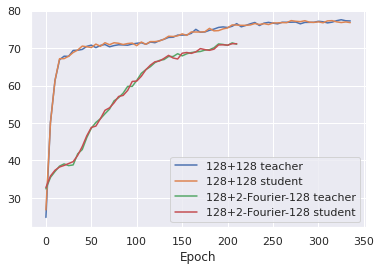

In [ ]:
acc_df.plot(x = "Epoch")

In [ ]:
loss =  loadLoss("/content/drive/MyDrive/DINO_Group/128+4_Same_Input/128+4/", model_name = "128+4 Same Input")

2.0102108079473178
0.47940383466084796
0.3941264146486918
0.3844549240589142
0.37439171877702077
0.3622544935941696
0.345705974427859
0.3337173469543457
0.28811521883010865
0.2937365146358808
0.26006164559523265
0.24851531500220297
0.24003488600651424
0.23862494553923608
0.23461341304977734
0.23624124298493068
0.23560642102559406
0.23791590701341628
0.2417479814330737
0.24487093853354455
0.2443589611053467
0.2432561783850193
0.23846356480518976
0.23051537576913833
0.2303679239710172
0.22838825154900552
0.2287253471752008
0.22967434134085973
0.22828217138648033
0.231691756717364
0.23119456957976023
0.2312903565307458
0.2352771651228269
0.25102660731871923
0.2372705892165502
0.23090245237747828
0.22661439622243246
0.22571412219603856
0.22712647675474484
0.22839552237987518
0.23019504294395446
0.22803195638259252
0.22798295191526413
0.22406445033947628
0.22505718088348706
0.22251176302830378
0.22525039610465367
0.2229484474082788
0.2240112000842889
0.22204581286907196
0.22424963308175405


In [ ]:
df_acc = pd.merge(df_acc, loss, how = "outer", on = "Epoch" )

,Epoch,128+128 teacher KNN acc,128+128 student KNN acc,128+4 Same Input teacher KNN acc,128+4 Same Input student KNN acc,128+4 Same Input Train Loss
0,0.0,24.80,26.80,31.81,32.09,2.010211
1,5.0,50.20,50.06,34.78,34.76,0.362254
2,10.0,61.33,61.34,36.03,36.71,0.260062
3,15.0,66.88,67.15,36.36,37.18,0.236241
4,20.0,67.82,67.17,38.07,37.58,0.244359
...,...,...,...,...,...,...
62,53.0,NaN,NaN,NaN,NaN,0.219672
63,54.0,NaN,NaN,NaN,NaN,0.219467
64,56.0,NaN,NaN,NaN,NaN,0.216683
65,57.0,NaN,NaN,NaN,NaN,0.214914


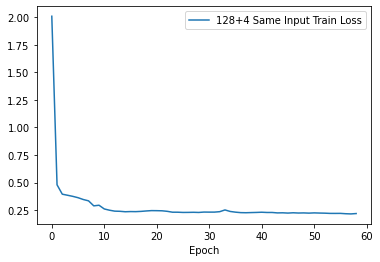

In [ ]:
loss.plot(x = "Epoch", y = "128+4 Same Input Train Loss")

In [ ]:
acc_df = loadKNNAcc("/content/drive/MyDrive/DINO_Group/128+128_TS/", "128+128", "teacher")

[[ 0.  24.8  7. ]]
[[ 5.  50.2  8. ]]
[[10.   61.33  9.  ]]
[[15.   66.88  9.  ]]
[[20.   67.82  9.  ]]
[[25.   67.78  9.  ]]
[[30.   69.35  9.  ]]
[[35.   69.41  9.  ]]
[[40.   69.63  9.  ]]
[[45.   70.45  9.  ]]
[[50.   70.77  9.  ]]
[[55.   70.11  9.  ]]
[[60.  70.7  9. ]]
[[65.   70.94  9.  ]]
[[70.   70.33  9.  ]]
[[75.   70.66  9.  ]]
[[80.   70.87  9.  ]]
[[85.   70.83  9.  ]]
[[90.   70.75  9.  ]]
[[95.   71.08  9.  ]]


In [ ]:
df = loadKNNAcc("/content/drive/MyDrive/DINO_Group/128+4_Same_Input/", "128+4 Same Input", "teacher")


[[ 0.   31.81  8.  ]]
[[ 5.   34.78  8.  ]]
[[10.   36.03  8.  ]]
[[15.   36.36  8.  ]]
[[20.   38.07  8.  ]]
[[25.   38.56  8.  ]]
[[30.   39.49  8.  ]]
[[35.   40.26  8.  ]]
[[40.   41.57  8.  ]]
[[45.   43.06  8.  ]]
[[50.   43.98  8.  ]]
[[55.   44.94  8.  ]]
[[60.   45.22  8.  ]]
[[65.  47.4  8. ]]
[[70.   48.53  8.  ]]
[[75.   47.59  8.  ]]
[[80.   47.64  8.  ]]
[[85.   47.86  8.  ]]
[[90.   47.59  8.  ]]
[[95.   48.71  8.  ]]


In [ ]:
acc_df = pd.merge(acc_df, df, how = "outer", on = "Epoch")

In [ ]:
acc_df = acc_df.drop("128+4 Same Input student KNN acc", axis = 1)

In [ ]:
acc_df

,Epoch,128+128 teacher KNN acc,128+128 student KNN acc,128+4 teacher KNN acc,128+4 student KNN acc,128+4 Same Input student KNN acc,128+4 Same Input teacher KNN acc
0,0.0,24.80,26.80,31.33,30.78,32.09,31.81
1,5.0,50.20,50.06,34.03,35.01,34.76,34.78
2,10.0,61.33,61.34,35.92,35.12,36.71,36.03
3,15.0,66.88,67.15,37.16,37.37,37.18,36.36
4,20.0,67.82,67.17,38.76,39.71,37.58,38.07
5,25.0,67.78,67.82,41.77,41.97,38.35,38.56
6,30.0,69.35,68.80,43.07,43.33,39.92,39.49
7,35.0,69.41,69.47,44.61,44.97,39.74,40.26
8,40.0,69.63,70.52,46.16,46.56,41.18,41.57
9,45.0,70.45,70.34,47.80,47.85,42.82,43.06


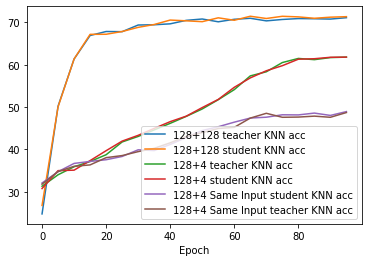

In [ ]:
acc_df.plot(x = "Epoch", )

# Expression Heatmap

## Create an Anndata objects
The columns of an  Anndata is gene

The row of an Anndata is cell

In [ ]:
import pandas as pd
newdata = pd.read_csv("/content/drive/MyDrive/scRNA/data/rna_withlabels.csv", index_col = 0)

In [ ]:
meta = pd.DataFrame(newdata[newdata.columns[-1]])

In [ ]:
cells = pd.DataFrame(index = newdata.index)
genes = pd.DataFrame(index = newdata.columns[0:-1])

In [ ]:
expr = newdata.drop(newdata.columns[-1], axis = 1)
expr = scipy.sparse.csr_matrix(expr)

In [ ]:
pip install scanpy

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
import seaborn as sns
import pickle

In [ ]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

In [ ]:
adata = ad.AnnData(expr, obs = cells, var = genes)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
adata.obs["Cell Type"] = np.array(meta[meta.columns[-1]])

# Load highlighted genes

In [ ]:
noticed_genes = pd.read_csv("/content/drive/Shareddrives/Documentation/Jiaxin_Li/Highest_10_genes_120_epochs.csv")

In [ ]:
markers = list(np.unique(np.array(noticed_genes)))

In [ ]:
len(markers)

23

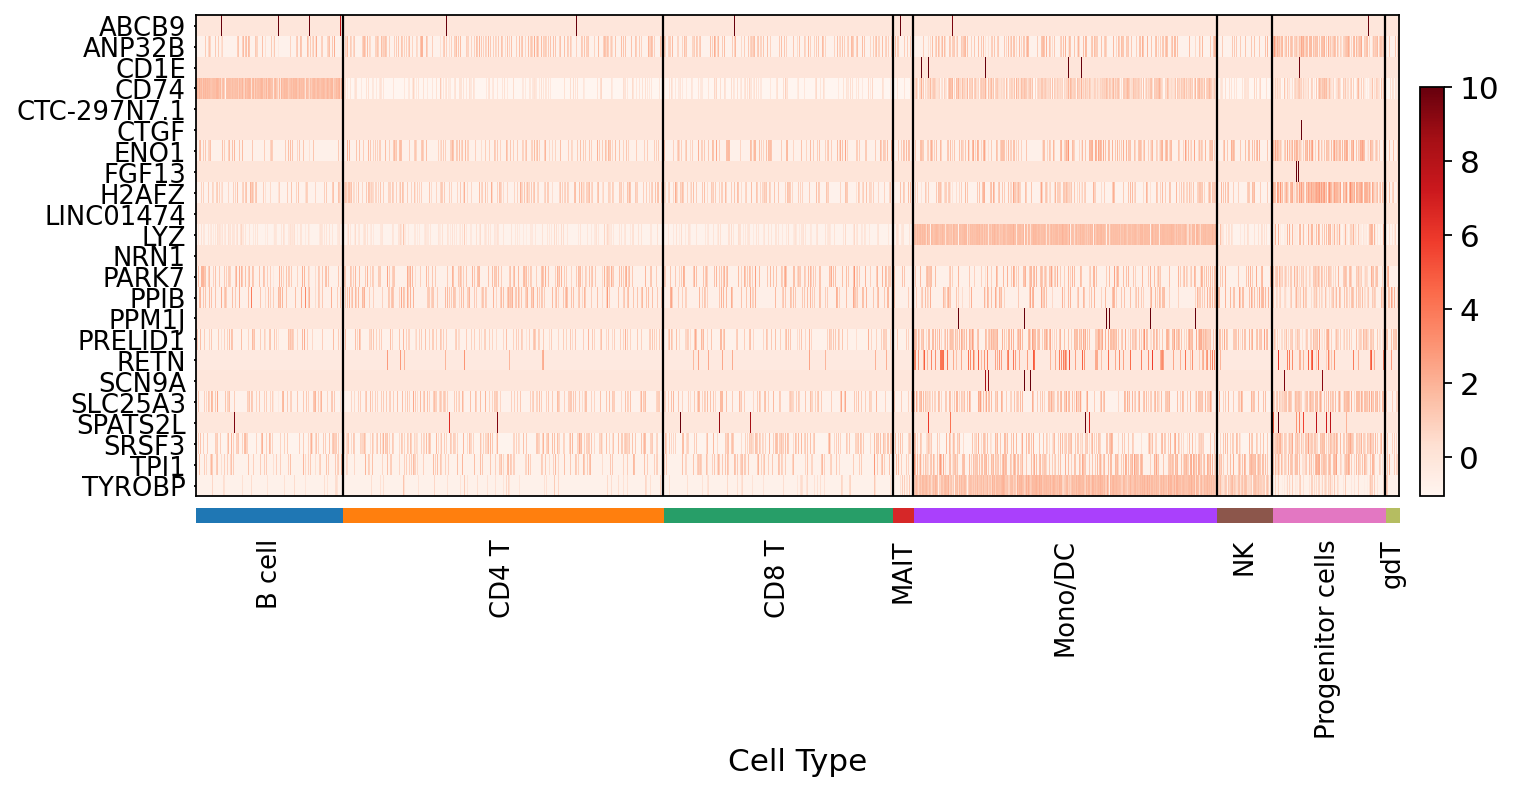

In [ ]:
sc.pl.heatmap(adata, markers, groupby='Cell Type', swap_axes=True, cmap='Reds')

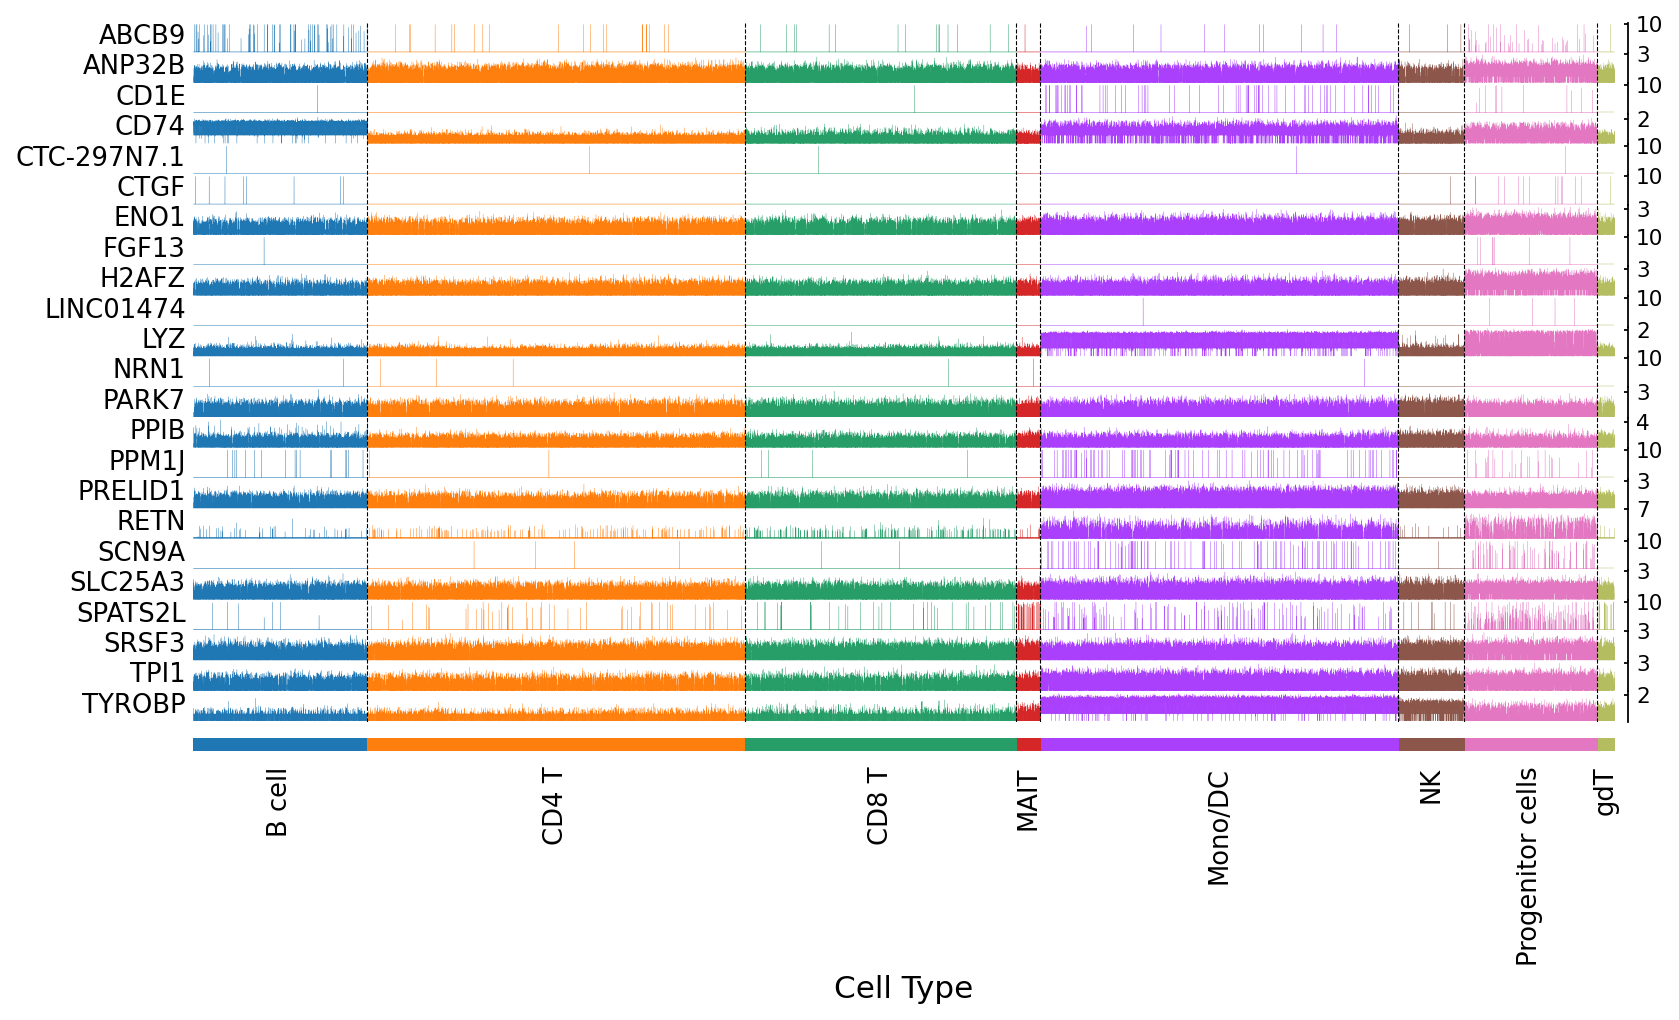

In [ ]:
sc.pl.tracksplot(adata, markers, groupby = "Cell Type")